세준이는 크기가 N×N인 배열 A를 만들었다. 배열에 들어있는 수 A[i][j] = i×j 이다. 이 수를 일차원 배열 B에 넣으면 B의 크기는 N×N이 된다. B를 오름차순 정렬했을 때, B[k]를 구해보자.

배열 A와 B의 인덱스는 1부터 시작한다.

첫째 줄에 배열의 크기 N이 주어진다. N은 105보다 작거나 같은 자연수이다. 둘째 줄에 k가 주어진다. k는 min(109, N2)보다 작거나 같은 자연수이다.

B[k]를 출력한다.

1. n^2 원소를 1차원 배열로 만들어 정렬한다!
-> 안됨

메모리 복잡도가 O(N^2)이 되기 때문에 안됨


만약, x가 어떤 배열에서 k번째로 작은 수라면, 

- x보다 작은 수가 k-1개 이하로 있다

- x보다 큰 수가 N-k개 이하로 있다 (N=배열의 전체 원소 개수)

이 두 조건을 활용하여 k번째 수인 x를 찾아내기

x가 될 수 있는 수의 범위 = (1, 25)

1. 가운데 값인 13에 대하여 두 조건을 만족하는지 확인

2. 만약 작은 수가 더 많다면 x보다 큰 수 이므로 high = mid - 1

3. 만약 큰 수가 더 많다면 x보다 작은 수이므로 low = mid + 1


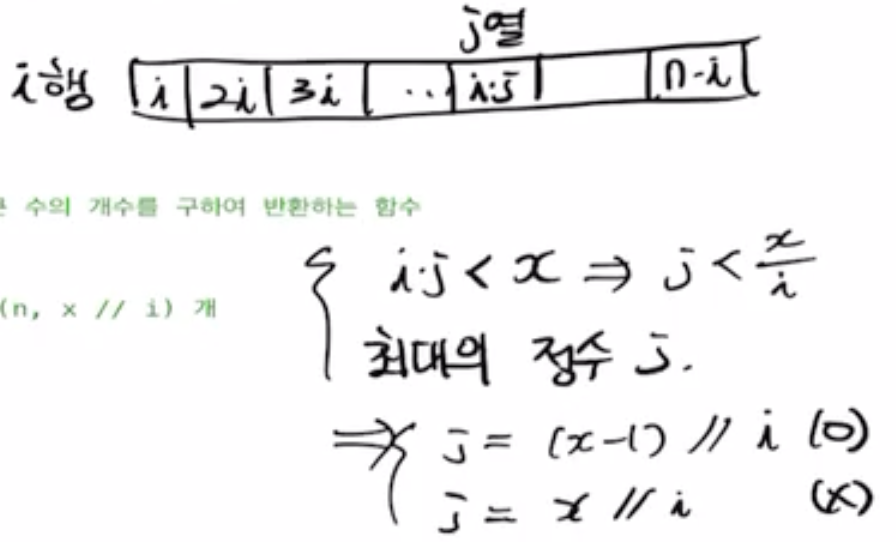

In [3]:
from IPython.display import Image
Image("스크린샷 2022-08-08 오후 7.11.58.png")

# x 보다 작은 수의 개수

In [ ]:
n = int(input())
k = int(input())

def get_num_smaller(x: int) -> int:
    # 문제에서 주어진 n x n 이차원 배열에서 x보다 작은 수의 개수를 구하여 반환하는 함수
    num_smaller = 0
    for i in range(1, n +1):
        # i번째 행에서 x보다 작은 수의 개수
        num_smaller += min(n, (x-1)//i)
    return num_smaller
# -> O(N)

def get_num_bigger(x: int) -> int:
    # 문제에서 주어진 n x n 이차원 배열에서 x보다 큰 수의 개수를 구하여 반환하는 함수
    num_bigger = 0
    for i in range(1, n+1):
        # n - (i번째 행에서 x보다 작거나 같은 수 개수)
        num_bigger += n - min(n, x // i)
    return num_bigger
# -> O(N)

# 이분 탐색을 수행하는 메인 로직
low = 1
high = min(n * n, int(1e9)) # 문제의 답이 10억 이하로 나왔기에
answer = -1 # 아직 못찾았다는 뜻

while low <= high:
    mid = (low + high) // 2
    
    num_smaller = get_num_smaller(mid)
    num_bigger = get_num_bigger(mid)
    
    if num_smaller > k -1:
        high = mid - 1
    elif num_bigger > n*n - k:
        low = mid + 1
    else:
        answer= mid
        break
# -> log(N^2) = logN

# 총 시간복잡도 = O(NlogN)
print(answer)